### Задание 1

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
boston = load_boston()
data = boston["data"]
feature_names = boston["feature_names"]
target = boston["target"]

In [3]:
X = pd.DataFrame(data, columns = feature_names)
y = pd.DataFrame(target, columns = ["price"])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [5]:
scaler = StandardScaler()

In [6]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

In [7]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [8]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

<function matplotlib.pyplot.show(close=None, block=None)>

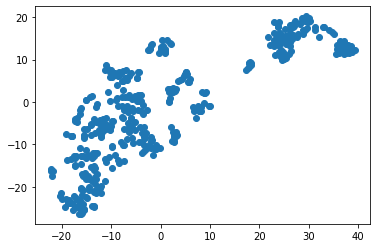

In [9]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show

### Задание 2

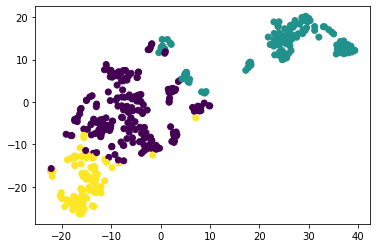

In [19]:
kmeans = KMeans(n_clusters=3,  max_iter=100, random_state=42)

labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [11]:
print('Кластер 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

Кластер 0: 0.42166020942408367
Кластер 1: 10.797028425196853
Кластер 2: 0.07356558139534886


In [12]:
print('Кластер 0: {}'.format(y_train[labels_train == 0].mean()))
print('Кластер 1: {}'.format(y_train[labels_train == 1].mean()))
print('Кластер 2: {}'.format(y_train[labels_train == 2].mean()))

Кластер 0: price    24.958115
dtype: float64
Кластер 1: price    16.165354
dtype: float64
Кластер 2: price    27.788372
dtype: float64


### *Задание 3

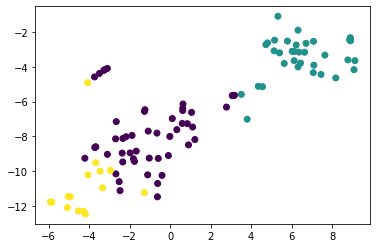

In [13]:
labels_test = kmeans.predict(X_test_scaled)

X_test_tsne = tsne.fit_transform(X_test_scaled)

plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)

plt.show()

In [14]:
print('Кластер 0: {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean()))

Кластер 0: 0.26607882352941176
Кластер 1: 10.165531142857143
Кластер 2: 0.062060000000000004


In [15]:
print('Кластер 0: {}'.format(y_test[labels_test == 0].mean()))
print('Кластер 1: {}'.format(y_test[labels_test == 1].mean()))
print('Кластер 2: {}'.format(y_test[labels_test == 2].mean()))

Кластер 0: price    21.860784
dtype: float64
Кластер 1: price    16.437143
dtype: float64
Кластер 2: price    31.35
dtype: float64
